# Packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import sys
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
sys.version

'3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]'

# Exploratory Data Analysis

### Reading data

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Summary Statistics

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Check outliers

boxplot

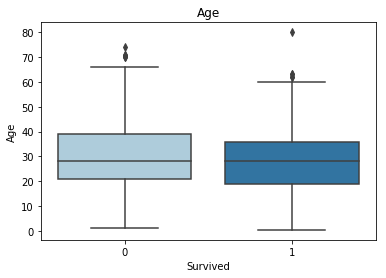

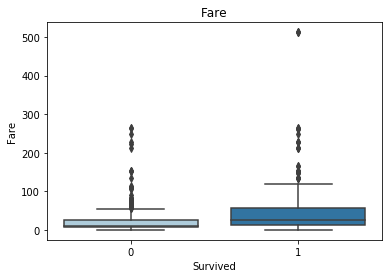

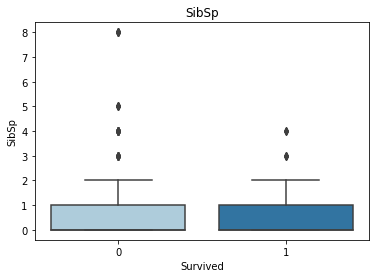

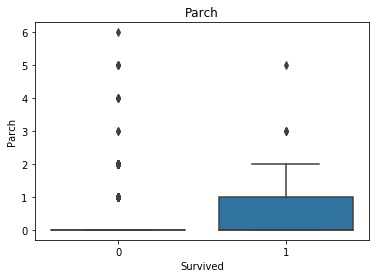

In [13]:
var_list = ['Age', 'Fare', 'SibSp','Parch']
for x in var_list:
    sns.boxplot(x='Survived', y=x, data=df, palette='Paired')
    plt.title(x)
    plt.show()

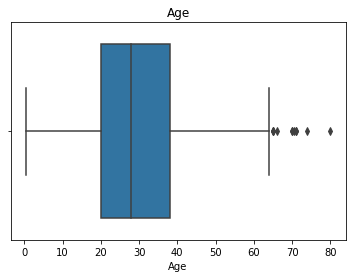

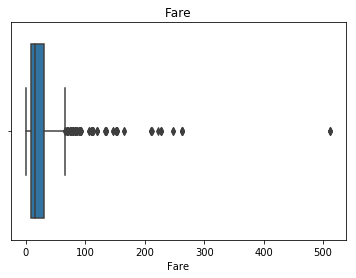

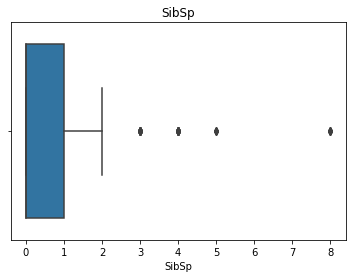

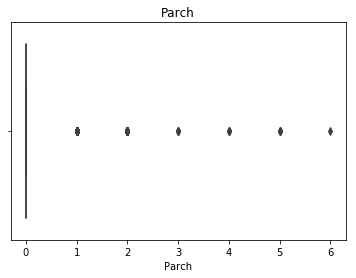

In [8]:
for x in var_list:
    sns.boxplot(x=df[x])
    plt.title(x)
    plt.show()

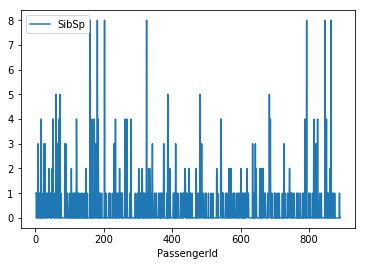

In [11]:
df.plot(x='PassengerId',y='SibSp')
plt.show()

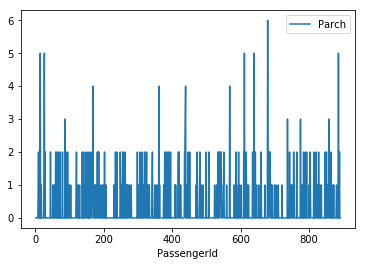

In [12]:
df.plot(x='PassengerId',y='Parch')
plt.show()

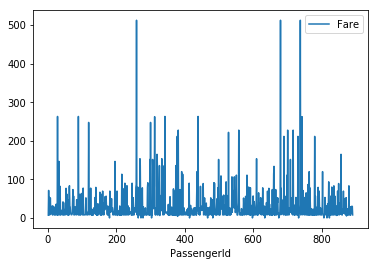

In [13]:
df.plot(x='PassengerId',y='Fare')
plt.show()

## Histogram

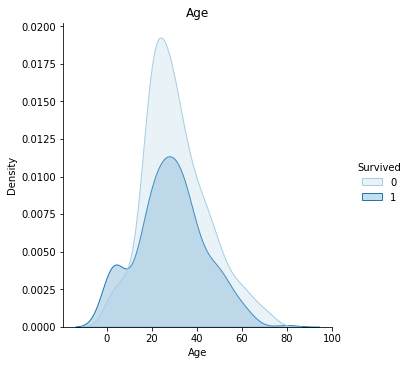

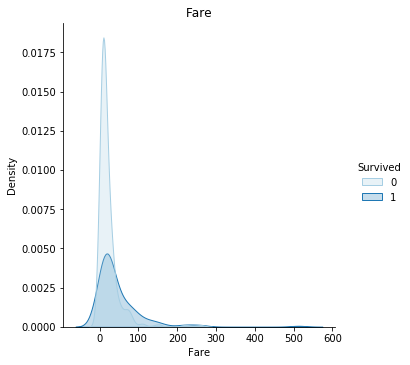

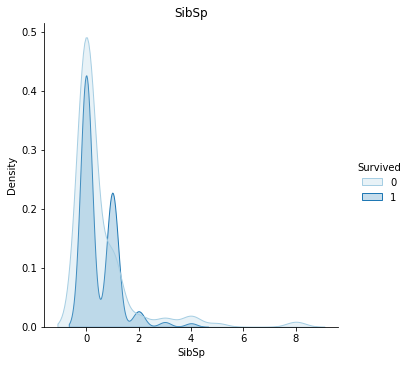

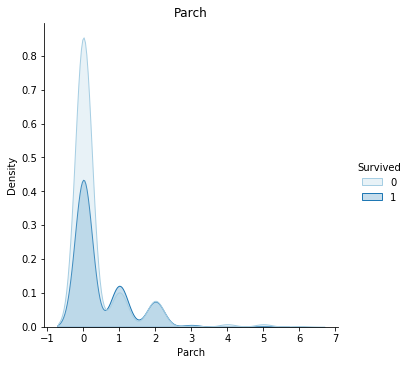

In [9]:
for x in var_list:
    sns.displot(df, x=df[x], hue='Survived', kind='kde', fill=True, palette='Paired')
    plt.title(x)
    plt.show()

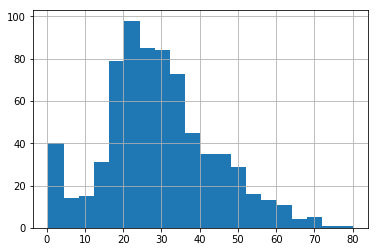

In [14]:
df['Age'].hist(bins=20)

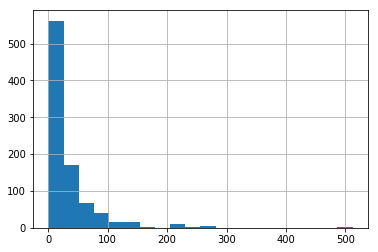

In [15]:
df['Fare'].hist(bins=20)

### Calculate survival rate by different categories using pandas pivot_table

In [10]:
cat_var_list = ['Pclass', 'Sex', 'SibSp', 'Embarked', 'Parch']

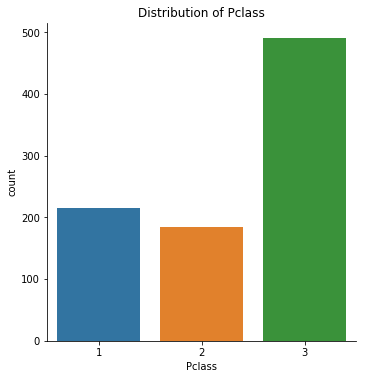

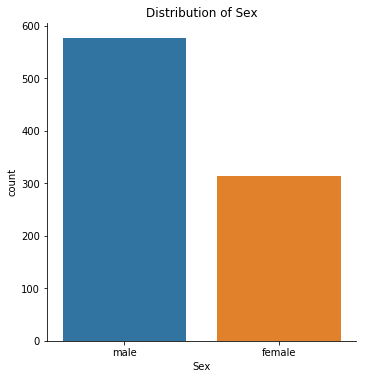

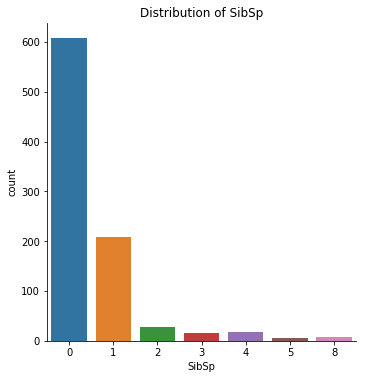

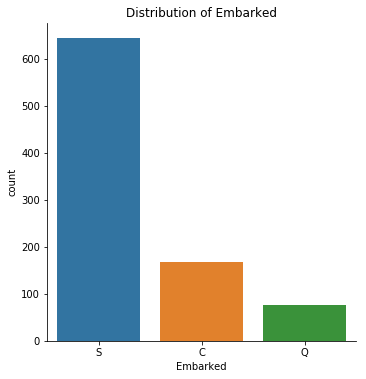

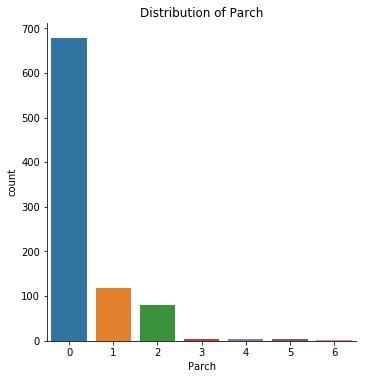

In [11]:
for x in cat_var_list:
    sns.catplot(data=df, kind='count', x=x)
    plt.title('Distribution of %s' % x)
    plt.show()

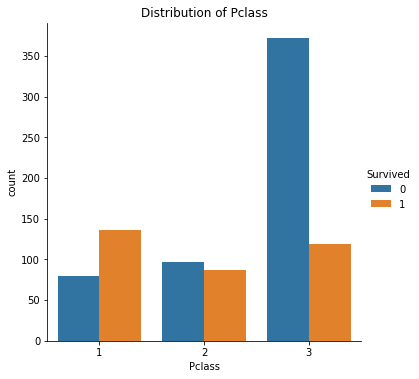

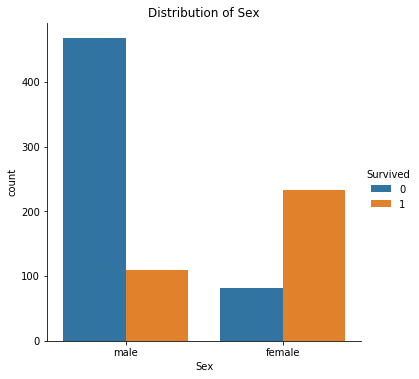

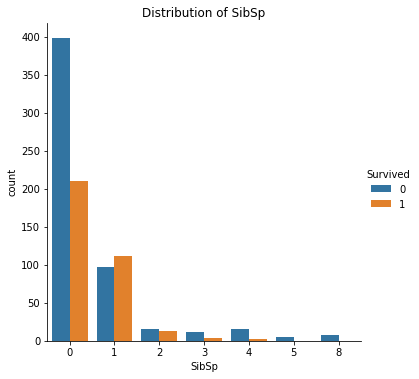

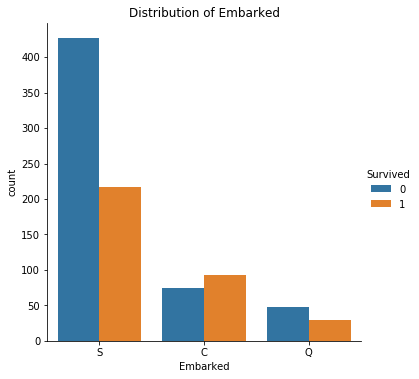

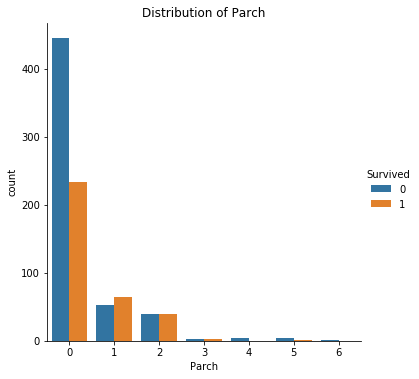

In [12]:
for x in cat_var_list:
    sns.catplot(data=df, kind='count', x=x, hue='Survived')
    plt.title('Distribution of %s' % x)
    plt.show()

In [16]:
def create_pivot(df, index, values, aggfunc, columns=None):
    if columns:
        pvt = df.pivot_table(index=index+columns,values=values, aggfunc=aggfunc)
    else:
        pvt = df.pivot_table(index=index,values=values, aggfunc=aggfunc)
    pvt_new = (pvt['sum']/pvt['len']).reset_index()
    if columns:
        pvt_new2 = pvt_new.pivot_table(index=index,values=values,columns=columns,aggfunc=aggfunc[0])
    else:
        pvt_new2 = pvt_new.pivot_table(index=index,values=values,aggfunc=[aggfunc[0]])
    
    pvt_new2.plot(kind='bar').legend()
    print(pvt_new2)

             sum
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


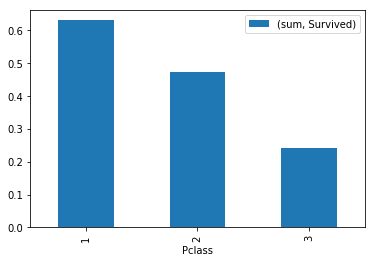

In [17]:
create_pivot(df,index=['Pclass'],values=['Survived'],aggfunc=['sum',len])

             sum
        Survived
Sex             
female  0.742038
male    0.188908


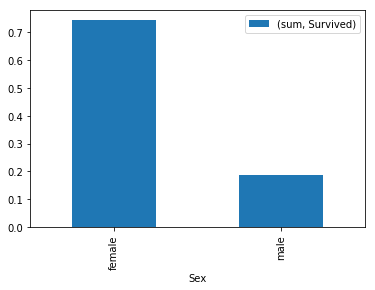

In [18]:
create_pivot(df,index=['Sex'],values=['Survived'],aggfunc=['sum',len])

            sum
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


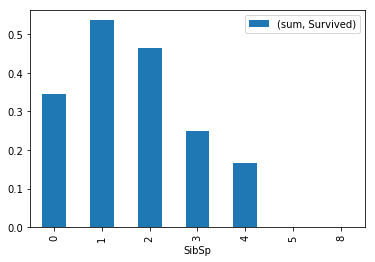

In [19]:
create_pivot(df,index=['SibSp'],values=['Survived'],aggfunc=['sum',len])

               sum
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


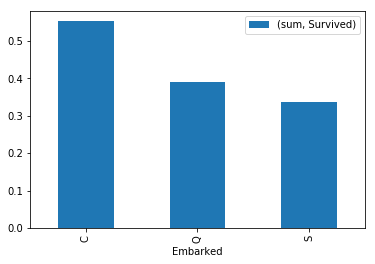

In [20]:
create_pivot(df,index=['Embarked'],values=['Survived'],aggfunc=['sum',len])

            sum
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


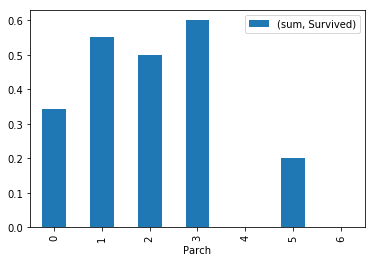

In [21]:
create_pivot(df,index=['Parch'],values=['Survived'],aggfunc=['sum',len])

          Survived                    
Embarked         C         Q         S
Pclass                                
1         0.694118  0.500000  0.582677
2         0.529412  0.666667  0.463415
3         0.378788  0.375000  0.189802


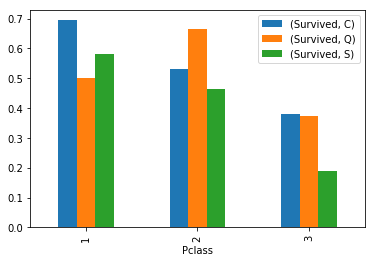

In [22]:
create_pivot(df,index=['Pclass'],values=['Survived'],aggfunc=['sum',len],columns=['Embarked'])

          Survived                    
Embarked         C         Q         S
Sex                                   
female    0.876712  0.750000  0.689655
male      0.305263  0.073171  0.174603


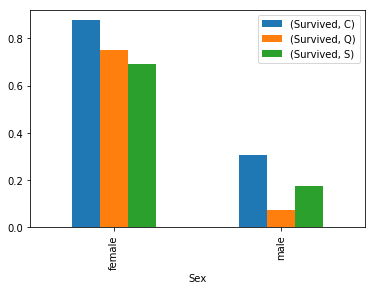

In [23]:
create_pivot(df,index=['Sex'],values=['Survived'],aggfunc=['sum',len],columns=['Embarked'])

### Frequency Table

In [24]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [27]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Average Fares by Pclass

### Create dummy variables for category variables

In [28]:
def create_dummies(df, var_list):
    res = df.copy()
    for var in var_list:
        dummy = pd.get_dummies(res[var],prefix=var,drop_first=True)
        res = pd.concat([res, dummy],axis=1)
        res = res.drop([var],axis=1)
    return res

In [29]:
df_new = create_dummies(df, ['Pclass','Sex','Embarked'])

In [30]:
df_new = df_new.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [31]:
df_new.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [32]:
df_new.describe()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.206510,0.551066,0.647587,0.086420,0.722783
std,0.486592,14.526497,1.102743,0.806057,49.693429,0.405028,0.497665,0.477990,0.281141,0.447876
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


### Check Missing Values

In [33]:
df_new.isnull().sum()

Survived        0
Age           177
SibSp           0
Parch           0
Fare            0
Pclass_2        0
Pclass_3        0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

#### impute missing with mean

In [34]:
df_new = df_new.fillna({'Age': df_new['Age'].mean()})

In [35]:
df_new.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Create target and X variables and split into Train and Test

In [36]:
y = df_new['Survived']
X = df_new.drop(['Survived'],axis=1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### prepare the same process for dataset without ground truth

In [38]:
X_wo_truth = pd.read_csv('test.csv')

In [39]:
X_wo_truth.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
X_wo_truth.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [41]:
X_wo_truth_new = create_dummies(X_wo_truth, ['Pclass','Sex','Embarked'])

In [42]:
X_wo_truth_new = X_wo_truth_new.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [43]:
X_wo_truth_new.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,1,1,0
1,47.0,1,0,7.0000,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,1,0
3,27.0,0,0,8.6625,0,1,1,0,1
4,22.0,1,1,12.2875,0,1,0,0,1


In [44]:
X_wo_truth_new.isnull().sum()

Age           86
SibSp          0
Parch          0
Fare           1
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [45]:
X_wo_truth_new =X_wo_truth_new.fillna({'Fare':df_new['Fare'].mean(),'Age':df_new['Age'].mean()})

In [46]:
X_wo_truth_new.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Logistics Regression

#### fit Logistic regression

In [59]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
logistic_reg.coef_

array([[-0.02781847, -0.33293215, -0.08541962,  0.00438477, -0.38844473,
        -1.50675918, -2.43663114,  0.13103533, -0.32443734]])

### Calculate AUC

In [48]:
roc_auc_score(y_train, logistic_reg.predict_proba(x_train)[:, 1])

0.8550899112817509

In [49]:
roc_auc_score(y_test, logistic_reg.predict_proba(x_test)[:, 1])

0.8505357142857143

In [50]:
def plot_roc_cur(model, x, y):
    probs = model.predict_proba(x)
    probs = probs[:,1]
    fper, tper, thresholds = roc_curve(y, probs) 
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

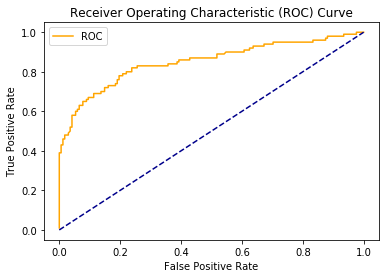

In [51]:
plot_roc_cur(logistic_reg,x_test,y_test)

#### Generate submission

In [52]:
X_wo_truth_new_probs = logistic_reg.predict_proba(X_wo_truth_new)  
X_wo_truth_new_preds = (X_wo_truth_new_probs[:, 1]>=0.5).astype(int)

In [53]:
data ={
    'PassengerId': list(X_wo_truth['PassengerId']),
    'Survived': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)

In [72]:
submission.to_csv('20210226_submission_1_Logistic.csv')

## Save and load trained models

In [199]:
pickle.dump(logistic_reg, open('logistic_reg.model', 'wb'))
bst = pickle.load(open('logistic_reg.model', 'rb'))

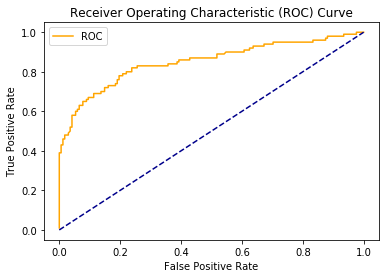

In [200]:
plot_roc_cur(bst,x_test,y_test)

### Logistic Regression with regulations L1, L2

In [54]:
logistic_reg = LogisticRegression(penalty='l1', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
logistic_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=10000.0, max_iter=1000000, multi_class='ovr',
          n_jobs=1, penalty='l1', random_state=None, solver='liblinear',
          tol=1e-06, verbose=0, warm_start=True)

In [55]:
roc_auc_score(y_train, logistic_reg.predict_proba(x_train)[:, 1])

0.8585822433352857

In [56]:
roc_auc_score(y_test, logistic_reg.predict_proba(x_test)[:, 1])

0.8528571428571428

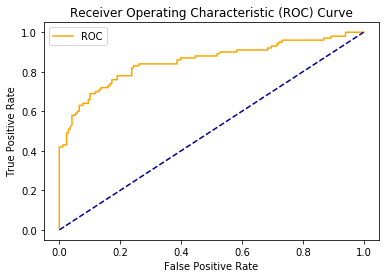

In [57]:
plot_roc_cur(logistic_reg,x_test,y_test)

In [58]:
logistic_reg.coef_

array([[-3.76890825e-02, -3.67670050e-01, -9.67945782e-02,
         2.35658599e-03, -6.58251348e-01, -1.88543768e+00,
        -2.65291036e+00,  0.00000000e+00, -4.57357645e-01]])

# Ramdom Forest

#### fit Random Forest

In [73]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### AUC

In [74]:
roc_auc_score(y_train, rf.predict_proba(x_train)[:, 1])

0.9977766208975944

In [75]:
roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

0.880267857142857

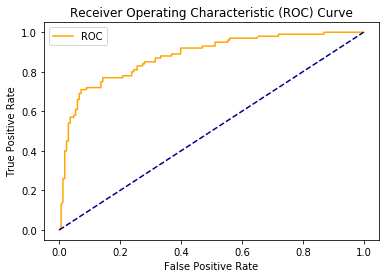

In [76]:
plot_roc_cur(rf,x_test,y_test)

In [77]:
X_wo_truth_new_probs = rf.predict_proba(X_wo_truth_new)  
X_wo_truth_new_preds = (X_wo_truth_new_probs[:, 1]>=0.5).astype(int)

data ={
    'PassengerId': list(X_wo_truth['PassengerId']),
    'Survived': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)

submission.to_csv('20210226_submission_2_Random_Forest_without_tuning.csv')

### Feature Importance

In [81]:
def create_feature_importance(model, x):
    importances = list(model.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
    
    ls1 = [x[0] for x in feature_importances]
    ls2 = [x[1] for x in feature_importances]
    ls1.reverse()
    ls2.reverse()
    plt.barh(ls1, ls2)

Variable: Age                  Importance: 0.27
Variable: Sex_male             Importance: 0.27
Variable: Fare                 Importance: 0.25
Variable: Pclass_3             Importance: 0.07
Variable: SibSp                Importance: 0.05
Variable: Parch                Importance: 0.04
Variable: Embarked_S           Importance: 0.03
Variable: Pclass_2             Importance: 0.02
Variable: Embarked_Q           Importance: 0.01


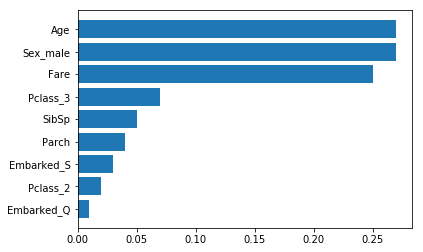

In [82]:
create_feature_importance(rf, x_train)

## Hyper-parameter tuning

In [312]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Random Search

In [83]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [84]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [207]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.5s


KeyboardInterrupt: 

### get the best model hyper parameter

In [86]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

### get the best model object

In [87]:
rf_random_best = rf_random.best_estimator_

### feature importance

Variable: Sex_male             Importance: 0.41
Variable: Fare                 Importance: 0.19
Variable: Age                  Importance: 0.15
Variable: Pclass_3             Importance: 0.11
Variable: SibSp                Importance: 0.05
Variable: Parch                Importance: 0.03
Variable: Embarked_S           Importance: 0.03
Variable: Pclass_2             Importance: 0.02
Variable: Embarked_Q           Importance: 0.01


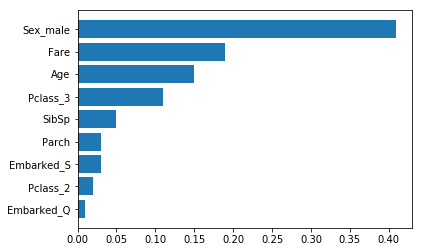

In [90]:
create_feature_importance(rf_random_best, x_train)

### AUC

In [91]:
roc_auc_score(y_train, rf_random_best.predict_proba(x_train)[:, 1])

0.9515411813192772

In [92]:
roc_auc_score(y_test, rf_random_best.predict_proba(x_test)[:, 1])

0.8891071428571429

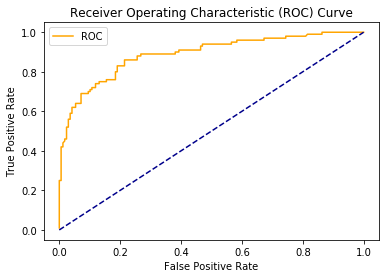

In [93]:
plot_roc_cur(rf_random_best,x_test,y_test)

In [94]:
X_wo_truth_new_probs = rf_random_best.predict_proba(X_wo_truth_new)  
X_wo_truth_new_preds = (X_wo_truth_new_probs[:, 1]>=0.5).astype(int)

data ={
    'PassengerId': list(X_wo_truth['PassengerId']),
    'Survived': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)

submission.to_csv('20210226_submission_3_Random_Forest_Random_Search.csv')

## Grid Search

In [95]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 3, 5, 7, 9],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.9min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [1, 3, 5, 7, 9], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [96]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [97]:
rf_grid_best = rf_grid.best_estimator_

Variable: Sex_male             Importance: 0.48
Variable: Fare                 Importance: 0.15
Variable: Pclass_3             Importance: 0.12
Variable: Age                  Importance: 0.11
Variable: SibSp                Importance: 0.05
Variable: Parch                Importance: 0.03
Variable: Embarked_S           Importance: 0.03
Variable: Pclass_2             Importance: 0.02
Variable: Embarked_Q           Importance: 0.01


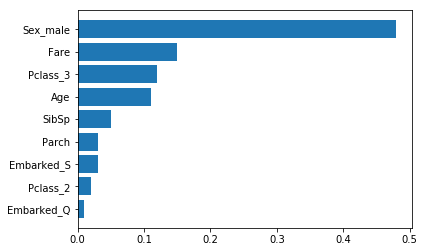

In [98]:
create_feature_importance(rf_grid_best, x_train)

### AUC

In [99]:
roc_auc_score(y_train, rf_grid_best.predict_proba(x_train)[:, 1])

0.9080009110431444

In [100]:
roc_auc_score(y_test, rf_grid_best.predict_proba(x_test)[:, 1])

0.8822619047619047

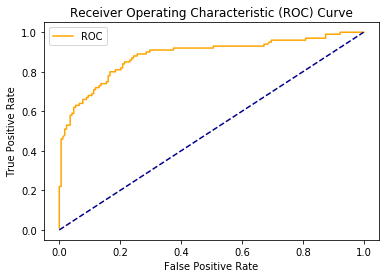

In [102]:
plot_roc_cur(rf_grid_best,x_test,y_test)

In [103]:
X_wo_truth_new_probs = rf_grid_best.predict_proba(X_wo_truth_new)  
X_wo_truth_new_preds = (X_wo_truth_new_probs[:, 1]>=0.5).astype(int)

data ={
    'PassengerId': list(X_wo_truth['PassengerId']),
    'Survived': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)

submission.to_csv('20210226_submission_4_Random_Forest_Grid_Search.csv')

## Save and loand trained models

In [197]:
pickle.dump(rf_grid_best, open('rf_grid_best.model', 'wb'))
bst = pickle.load(open('rf_grid_best.model', 'rb'))

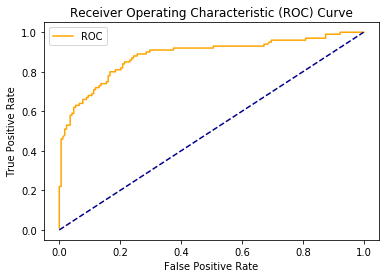

In [198]:
plot_roc_cur(bst,x_test,y_test)

### XGBoost

In [104]:
xgb_model = xgb.sklearn.XGBClassifier(nthread=-1, seed=42, use_label_encoder=False)
xgb_model.fit(x_train, y_train)

[22:36:59] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, nthread=-1, num_parallel_tree=1,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
       tree_method='exact', use_label_encoder=False, validate_parameters=1,
       verbosity=None)

### AUC

In [105]:
roc_auc_score(y_train, xgb_model.predict_proba(x_train)[:, 1])

0.9954881672848744

In [106]:
roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1])

0.8624404761904761

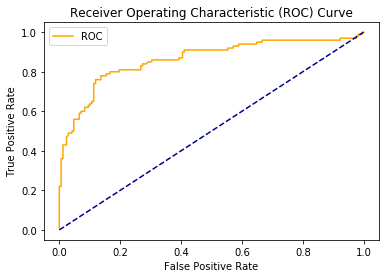

In [107]:
plot_roc_cur(xgb_model,x_test,y_test)

Variable: Sex_male             Importance: 0.4699999988079071
Variable: Pclass_3             Importance: 0.20000000298023224
Variable: SibSp                Importance: 0.10000000149011612
Variable: Embarked_S           Importance: 0.05999999865889549
Variable: Age                  Importance: 0.03999999910593033
Variable: Fare                 Importance: 0.03999999910593033
Variable: Pclass_2             Importance: 0.03999999910593033
Variable: Parch                Importance: 0.029999999329447746
Variable: Embarked_Q           Importance: 0.029999999329447746


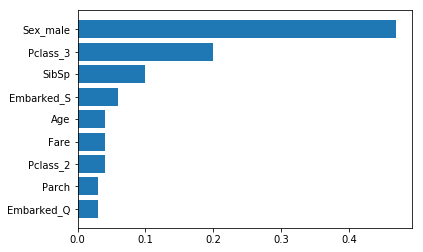

In [108]:
create_feature_importance(xgb_model, x_train)

## Hyper parameter tuning

#### Fit a single XGBoost Model and output performance given hyper parameter setting

In [131]:
from sklearn import cross_validation, metrics
def modelfit(alg, x_train, y_train, x_test, y_test, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        print(xgb_param)
        xgtrain = xgb.DMatrix(x_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(x_train, y_train, eval_metric='auc')
                
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy (Train) : %.4g" % metrics.accuracy_score(y_train.values, alg.predict(x_train)))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, alg.predict_proba(x_train)[:,1]))
    print ("Accuracy (Test) : %.4g" % metrics.accuracy_score(y_test.values, alg.predict(x_test)))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, alg.predict_proba(x_test)[:,1]))
    
    create_feature_importance(alg,x_train)                
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'gamma': None, 'gpu_id': None, 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'monotone_constraints': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

Model Report
Accuracy (Train) : 0.8764
AUC Score (Train): 0.934850
Accuracy (Test) : 0.8358
AUC Score (Test): 0.883512
Variable: Sex_male             Importance: 0.6899999976158142
Variable: Pclass_3             Importance: 0.1599999964237213
Variable: SibSp                Importance: 0.05999999865889549
Variable: Embarked_S           Importance: 0.029999999329447746
Variable: Age                  Importance: 0.019999999552965164
Variable: Fa

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


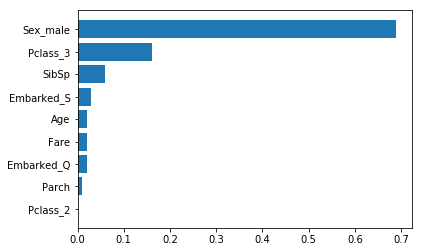

In [132]:
xgb1 = xgb.sklearn.XGBClassifier()
modelfit(xgb1, x_train, y_train, x_test, y_test)

### Grid Search

In [147]:
param_test = {
 'learning_rate':[0.001,0.01,0.1],
  'n_estimators':[200,400],
 'max_depth':[4,5,6],
 'min_child_weight': [1],
 'reg_alpha':[0,0.001],
 'reg_lambda':[0,0.001],
 'gamma':[0,1],
 'subsample':[0.8],
 'colsample_bytree':[0.8],
 'objective':['binary:logistic']
}
xgb_grid = GridSearchCV(estimator = xgb.sklearn.XGBClassifier(), param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
xgb_grid.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:16:30] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': [200, 400], 'max_depth': [4, 5, 6], 'min_child_weight': [1], 'reg_alpha': [0, 0.001], 'reg_lambda': [0, 0.001], 'gamma': [0, 1], 'subsample': [0.8], 'colsample_bytree': [0.8], 'objective': ['binary:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [155]:
len(xgb_grid.grid_scores_)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


144

In [156]:
xgb_grid.best_params_, 

({'colsample_bytree': 0.8,
  'gamma': 1,
  'learning_rate': 0.001,
  'max_depth': 6,
  'min_child_weight': 1,
  'n_estimators': 400,
  'objective': 'binary:logistic',
  'reg_alpha': 0,
  'reg_lambda': 0.001,
  'subsample': 0.8},)

In [150]:
xgb_grid.best_score_

0.8753278938882456

In [151]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.001, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=400, n_jobs=8, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=0.001, scale_pos_weight=1, subsample=0.8,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 1, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.001, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 0.001, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy (Train) : 0.8732
AUC Score (Train): 0.931477
Accuracy (Test) : 0.8284
AUC Score (Test): 0.880060
Variable: Sex_male             Importance: 0.6800000071525574
Variable: Pclass_3             Importance: 0.12999999523162842
Variable: SibSp                Importance: 0.03999999910593033
Variable: Embarked_S           Importance: 0.03999999910593033
Variable: Pclass_2             Importance: 0.029999999329447746
Variable: Age                  Importance: 0.019999999552965164
Variable: Fare                 Importance: 0.019999999552965164
Variable: Embarked_Q           Importance: 0.019999999552965164
Variable: Parch                Importance: 0.009999999776482582


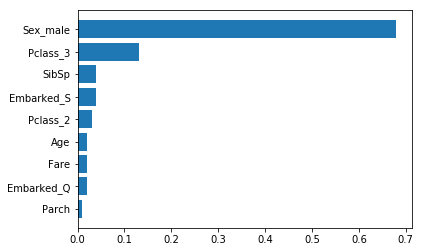

In [152]:
modelfit(xgb_grid.best_estimator_, x_train, y_train, x_test, y_test)

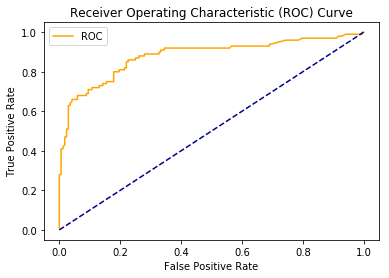

In [153]:
plot_roc_cur(xgb_grid.best_estimator_,x_test,y_test)

In [154]:
X_wo_truth_new_probs = xgb_grid.best_estimator_.predict_proba(X_wo_truth_new)  
X_wo_truth_new_preds = (X_wo_truth_new_probs[:, 1]>=0.5).astype(int)

data ={
    'PassengerId': list(X_wo_truth['PassengerId']),
    'Survived': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)

submission.to_csv('20210227_submission_5_XGBoost_Grid_Search.csv')

## Save and load trained models

In [194]:
xgb_grid_best = xgb_grid.best_estimator_

In [195]:
pickle.dump(xgb_grid_best, open('xgb_grid_best.model', 'wb'))
bst = pickle.load(open('xgb_grid_best.model', 'rb'))

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 1, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.001, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 0.001, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy (Train) : 0.8732
AUC Score (Train): 0.931477
Accuracy (Test) : 0.8284
AUC Score (Test): 0.880060
Variable: Sex_male             Importance: 0.6800000071525574
Variable: Pclass_3             Importance: 0.12999999523162842
Variable: SibSp                Importance: 0.03999999910593033
Variable: Embarked_S           Importance: 0.03999999910593033
Variable: Pclass_2             Importance: 0.029999999329447746
Variable: Age                  Importance: 0.019999999552965164
Variable: Fare                 Importance: 0.019999999552965164
Variable: Embarked_Q           Importance: 0.019999999552965164
Variable: Parch                Importance: 0.009999999776482582


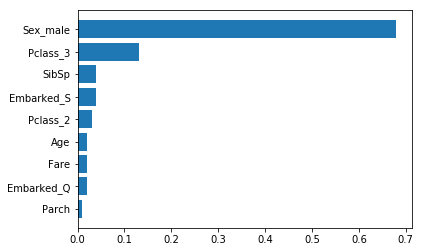

In [196]:
modelfit(bst, x_train, y_train, x_test, y_test)

## RandomSearch

In [168]:
param_test = {
 'learning_rate':[0.0001, 0.0005, 0.001,0.01,0.1,0.2],
  'n_estimators':[400,500,600,700,800,900,1000,1500],
 'max_depth':[4,5,6,7,8,9,10],
 'min_child_weight': [1],
 'reg_alpha':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'reg_lambda':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'gamma':[0, 0.001, 0.01, 0.1, 1, 5, 10, 100],
 'subsample':[0.8],
 'colsample_bytree':[0.8],
 'objective':['binary:logistic']
}
xgb_random = RandomizedSearchCV(estimator = xgb.sklearn.XGBClassifier(), param_distributions = param_test, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
xgb_random.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.9min finished
C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:49:44] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
          fit_params=None, iid=True, n_iter=300, n_jobs=-1,
          param_distributions={'learning_rate': [0.0001, 0.0005, 0.001, 0.01, 0.1, 0.2], 'n_estimators': [400, 500, 600, 700, 800, 900, 1000, 1500], 'max_depth': [4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1], 'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0, 0.001, 0.01, 0.1, 1, 5, 10, 100], 'subsample': [0.8], 'colsample_bytree': [0.8], 'objective': ['binary:logistic']},
          pre_dispatch='2*n_jobs', r

In [169]:
xgb_random.grid_scores_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.79615, std: 0.03036, params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'objective': 'binary:logistic', 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.8},
 mean: 0.78652, std: 0.02407, params: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 10, 'objective': 'binary:logistic', 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.8},
 mean: 0.77528, std: 0.02116, params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'objective': 'binary:logistic', 'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.0001, 'gamma': 10, 'colsample_bytree': 0.8},
 mean: 0.81380, std: 0.02517, params: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.001, 'objective': 'binary:logistic', 'n_estimators': 800, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8},
 mean: 0.7865

In [170]:
xgb_random.best_params_

({'colsample_bytree': 0.8,
  'gamma': 1,
  'learning_rate': 0.01,
  'max_depth': 7,
  'min_child_weight': 1,
  'n_estimators': 700,
  'objective': 'binary:logistic',
  'reg_alpha': 0.001,
  'reg_lambda': 0.01,
  'subsample': 0.8},)

In [171]:
xgb_random.best_score_

0.8298555377207063

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 1, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0.001, 'reg_lambda': 0.01, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy (Train) : 0.8892
AUC Score (Train): 0.947371
Accuracy (Test) : 0.8246
AUC Score (Test): 0.883244
Variable: Sex_male             Importance: 0.6800000071525574
Variable: Pclass_3             Importance: 0.11999999731779099
Variable: SibSp                Importance: 0.03999999910593033
Variable: Fare                 Importance: 0.029999999329447746
Variable: Pclass_2             Importance: 0.029999999329447746
Variable: Embarked_Q           Importance: 0.029999999329447746
Variable: Embarked_S           Importance: 0.029999999329447746
Variable: Age                  Importance: 0.019999999552965164
Variable: Parch                Importance: 0.019999999552965164


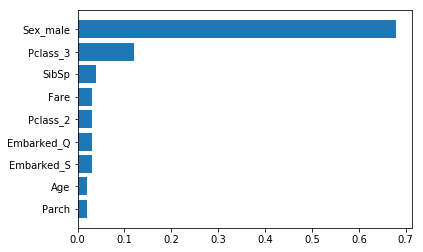

In [172]:
modelfit(xgb_random.best_estimator_, x_train, y_train, x_test, y_test)

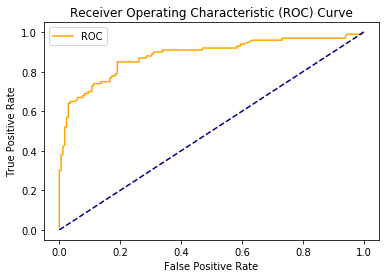

In [173]:
plot_roc_cur(xgb_random.best_estimator_,x_test,y_test)

In [174]:
X_wo_truth_new_probs = xgb_random.best_estimator_.predict_proba(X_wo_truth_new)  
X_wo_truth_new_preds = (X_wo_truth_new_probs[:, 1]>=0.5).astype(int)

data ={
    'PassengerId': list(X_wo_truth['PassengerId']),
    'Survived': list(X_wo_truth_new_preds)
}
submission = pd.DataFrame(data)

submission.to_csv('20210227_submission_6_XGBoost_Random_Search.csv')

# Save and Load trained XGB models

In [185]:
import pickle

In [186]:
xgb_random_best = xgb_random.best_estimator_

In [187]:
pickle.dump(xgb_random_best, open('xgb_random_best.model', 'wb'))

In [188]:
bst = pickle.load(open('xgb_random_best.model', 'rb'))

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 1, 'gpu_id': -1, 'interaction_constraints': '', 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 1, 'monotone_constraints': '()', 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0.001, 'reg_lambda': 0.01, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy (Train) : 0.8892
AUC Score (Train): 0.947371
Accuracy (Test) : 0.8246
AUC Score (Test): 0.883244
Variable: Sex_male             Importance: 0.6800000071525574
Variable: Pclass_3             Importance: 0.11999999731779099
Variable: SibSp                Importance: 0.03999999910593033
Variable: Fare                 Importance: 0.029999999329447746
Variable: Pclass_2             Importance: 0.029999999329447746
Variable: Embarked_Q           Importance: 0.029999999329447746
Variable: Embarked_S           Importance: 0.029999999329447746
Variable: Age                  Importance: 0.019999999552965164
Variable: Parch                Importance: 0.019999999552965164


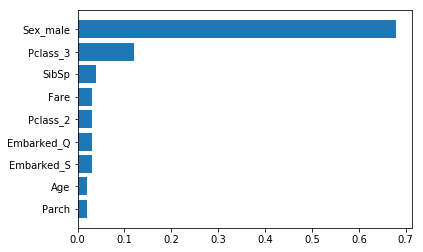

In [191]:
modelfit(bst, x_train, y_train, x_test, y_test)

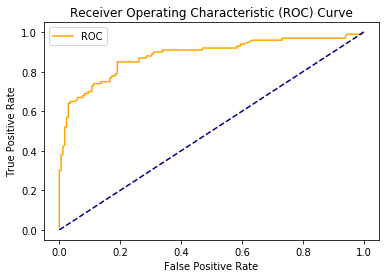

In [190]:
plot_roc_cur(bst,x_test,y_test)